In [1]:
import matplotlib

# Set font and fontsize globally
matplotlib.rcParams["font.family"] = "Arial"
matplotlib.rcParams["font.size"] = 11

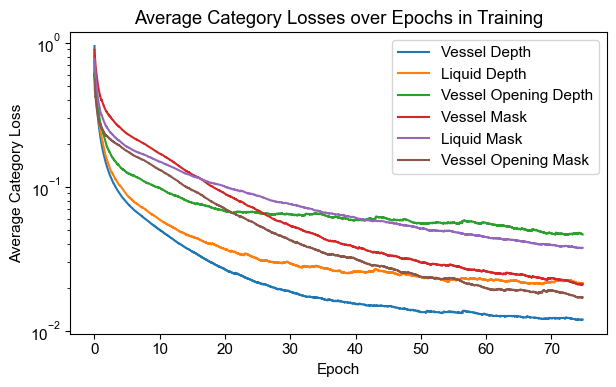

In [2]:
import matplotlib.pyplot as plt

x = []  # epoch
y_depth = []
y_mask = []
y_total = []
y_emptyvessel_depth = []
y_contentdepth = []
y_vesselopening_depth = []
y_vesselmask = []
y_contentmaskclean = []
y_vesselopeningmask = []

# read data from file
with open("../logs/TrainLoss_24032023-1638.txt") as f:
    # delete first line
    f.readline()

    for line in f:
        fields = line.strip().split("\t")
        epoch = int(fields[0])
        x.append(epoch / 300)
        y_depth.append(float(fields[1].split()[4]))
        y_mask.append(float(fields[2].split()[4]))
        y_total.append(float(fields[3].split()[4]))
        y_emptyvessel_depth.append(float(fields[4].split()[4]))
        y_contentdepth.append(float(fields[5].split()[4]))
        y_vesselopening_depth.append(float(fields[6].split()[4]))
        y_vesselmask.append(float(fields[7].split()[4]))
        y_contentmaskclean.append(float(fields[8].split()[4]))
        y_vesselopeningmask.append(float(fields[9].split()[4]))

# plot the data
plt.figure(figsize=(6.3, 4))
# plt.plot(x, y_depth, label="Depth")
# plt.plot(x, y_mask, label="Mask")
# plt.plot(x, y_total, label="Total")
# only plot 75 % of the data
total = len(x)
p = 0.44
x = x[: int(total * p)]
y_depth = y_depth[: int(total * p)]

plt.plot(x, y_emptyvessel_depth[: int(total * p)], label="Vessel Depth")
plt.plot(x, y_contentdepth[: int(total * p)], label="Liquid Depth")
plt.plot(x, y_vesselopening_depth[: int(total * p)], label="Vessel Opening Depth")
plt.plot(x, y_vesselmask[: int(total * p)], label="Vessel Mask")
plt.plot(x, y_contentmaskclean[: int(total * p)], label="Liquid Mask")
plt.plot(x, y_vesselopeningmask[: int(total * p)], label="Vessel Opening Mask")
# scale y axis in log
plt.yscale("log")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Average Category Loss")
plt.title("Average Category Losses over Epochs in Training")
plt.tight_layout()
plt.savefig("../output/losses_log.png", format="png", dpi=600)
plt.show()